<a href="https://colab.research.google.com/github/avellar1975/DataScience/blob/main/regressao_teste_carga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear para teste de carga do SAP BANKING

Modelo para testes de performance com uma base referencial com objetivo de projetar a execução de processos bach com 15 milhões de contratos.

## Importando bibliotecas

In [374]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

## Criando as variáveis capturadas nos testes de carga com 21 medições

In [375]:
# variável preditora - contratos
x = np.array([x for x in range(200000, 5200000, 240000)])
             
# variável preditora - horas
y = np.array([ 0.15, 0.3, 0.45, 1, 1.2, 1.4, 1.7, 2.0, 2.4, 2.8, 3.2, 3.7, 4.2, 4.7, 5.3, 5.9, 6.6, 7.3, 8, 8.7, 9.4])
#y = np.array([ 0.15, 0.3, 0.45, 1, 1.2, 1.4, 1.7, 2.0, 2.0, 2.8, 3.2, 3.7, 4.5, 4.7, 5.3, 5.9, 6.6, 7.3, 8, 8.7, 9])

In [376]:
print(x)
print(len(x))
print(y)
print(len(y))

[ 200000  440000  680000  920000 1160000 1400000 1640000 1880000 2120000
 2360000 2600000 2840000 3080000 3320000 3560000 3800000 4040000 4280000
 4520000 4760000 5000000]
21
[0.15 0.3  0.45 1.   1.2  1.4  1.7  2.   2.4  2.8  3.2  3.7  4.2  4.7
 5.3  5.9  6.6  7.3  8.   8.7  9.4 ]
21


## Criando um Data Frame com as variáveis

In [377]:
# Transformamos com o pandas esses dados em um DataFrame
df = pd.DataFrame(data=x, columns=['contratos'])

# Juntamos ao DataFrame o target(y), nossa saida
df['horas'] = y
df

,contratos,horas
0,200000,0.15
1,440000,0.30
2,680000,0.45
3,920000,1.00
4,1160000,1.20
5,1400000,1.40
6,1640000,1.70
7,1880000,2.00
8,2120000,2.40
9,2360000,2.80


## Dados estatísticos do Data Frame

In [378]:
df.describe()

,contratos,horas
count,2.100000e+01,21.000000
mean,2.600000e+06,3.828571
std,1.489161e+06,2.905580
min,2.000000e+05,0.150000
25%,1.400000e+06,1.400000
50%,2.600000e+06,3.200000
75%,3.800000e+06,5.900000
max,5.000000e+06,9.400000


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   contratos  21 non-null     int64  
 1   horas      21 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


## Visualização Gráfica dos Dados

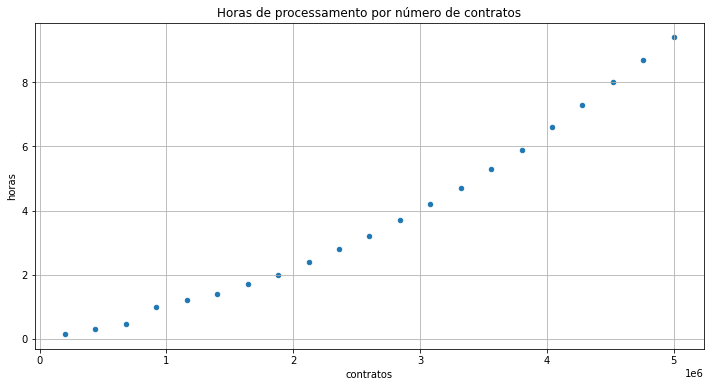

In [380]:
df.plot(x='contratos', y='horas', kind='scatter', figsize=(12,6))
plt.title('Horas de processamento por número de contratos')
plt.grid()
plt.show()

## Dados para geração do modelo

In [381]:
X = df[['contratos']]
y = df.horas

## Dividindo os dados de treinamento e dados de teste

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.25)

## Criando o modelo de Regressão Linear

In [383]:
# Criando o modelo LinearRegression
regr = LinearRegression()

# Realizar treinamento do modelo
regr.fit(X_train, y_train)

# Realizar predição com os dados separados para teste
y_pred = regr.predict(X_test)

# Visualização dos 20 primeiros resultados
y_pred

array([6.27005047, 3.97569876, 3.51682842, 3.05795807, 2.14021739,
       6.72892081])

## Cálculo do Erro Médio Absoluto

In [384]:
# Erro Médio Absoluto (Mean Absolute Error)
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

MAE: 0.51


## Cálculo do Erro Quadrado Médio

In [385]:
# Erro Quadrado Médio (Mean Squared Error)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 0.32


## Coeficiente de Determinação

O coeficiente de determinação, também chamado de R², é uma medida de ajuste de um modelo estatístico linear generalizado, como a regressão linear simples ou múltipla, aos valores observados de uma variável aleatória. O R² varia entre 0 e 1, por vezes sendo expresso em termos percentuais. Nesse caso, expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. 

In [386]:
print('R2 Score: %.2f' % r2_score(y_test, y_pred))

R2 Score: 0.91


## Gráfico comparativo do modelo com os dados de teste

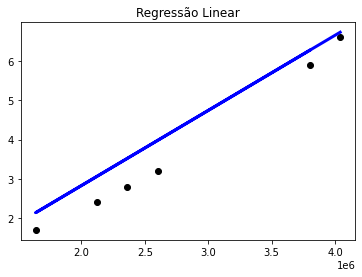

In [387]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Regressão Linear')
plt.show()

## Previsão para 15.000.000 de transações

In [388]:
regr.predict([[10000000]])[0]

18.124200957556937

# Regressão Polinomial

É recomendável utilizar regressão polinomial apenas em casos de não linearidades mais simples, por exemplo quando se desconfia de alguma relação marginalmente decrescente (ou marginalmente crescente). Nesses casos, utilizar um polinômio de grau dois basta e polinômios com grau superior tendem a sobre-ajustar.

In [389]:
#IMPORTANDO BIBLIOTECAS PARA REGRESSÃO POLINOMIAL
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [390]:
df.head()

,contratos,horas
0,200000,0.15
1,440000,0.30
2,680000,0.45
3,920000,1.00
4,1160000,1.20


## Criando o modelo de Regressão Polinomial

In [391]:
#Cria modelo de treinamento com base no grau do polinômio de grau 2
poly = PolynomialFeatures(degree=2) 

features_train = poly.fit_transform(X_train) #cria as features de treino
features_test = poly.fit_transform(X_test) #cria as features de teste
features = poly.fit_transform(X) #cria as features geral

#Inicia modelo de regressão
lin = LinearRegression() 

# Realizar treinamento do modelo com features de treinamento
lin.fit(features_train,y_train)


# Realizar predição com os dados separados para teste
predict_test=lin.predict(features_test) 


predict=lin.predict(features) 

In [392]:
# Erro Médio Absoluto (Mean Absolute Error)
print('MAE: %.2f' % mean_absolute_error(y_test, predict_test))

MAE: 0.03


In [393]:
# Erro Quadrado Médio (Mean Squared Error)
print('Mean squared error: %.2f' % mean_squared_error(y_test, predict_test))

Mean squared error: 0.00


In [394]:
print('R2 Score: %.2f' % r2_score(y_test, predict_test))

R2 Score: 1.00


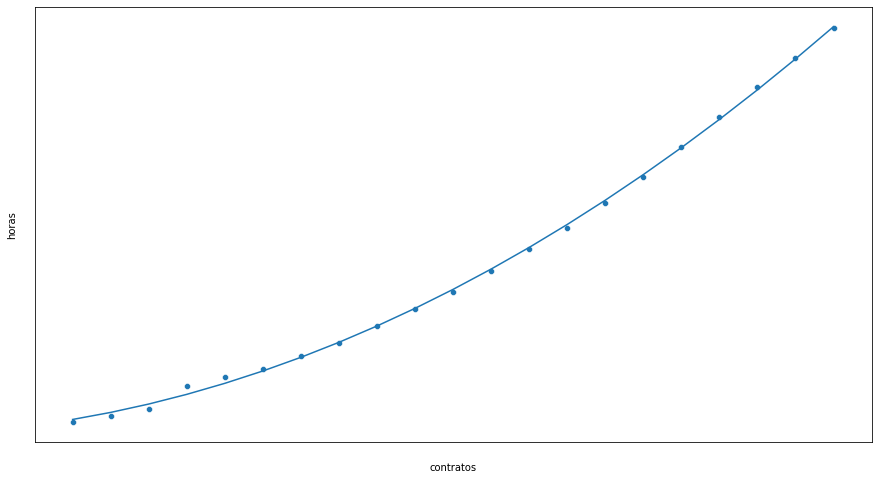

In [395]:
fig2,ax2=plt.subplots(1,figsize=(15,8))

ax2=sns.scatterplot(x=df['contratos'], y=df['horas'])
ax2=sns.lineplot(x=df['contratos'], y=predict)
ax2.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
fig2.show()

In [396]:
rmse = np.sqrt(mean_squared_error(y,predict))
r2 = r2_score(y,predict)
print(rmse)
print(r2)

0.07474392409529647
0.9993051748481879


In [397]:
#prev = np.array(5000000).reshape(-1,1)

lin.predict(poly.fit_transform([[10000000]]))[0]


32.26016026739841

Autor: Evandro Avellar